In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lottery-uk-euromillions-all-data/eum_df.csv
/kaggle/input/lottery-uk-euromillions-all-data/lottery-uk-euromillions-all-data-eda.ipynb


In [18]:
import base64
import io
import os

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("/kaggle/input/lottery-uk-euromillions-all-data/eum_df.csv")

In [20]:
df.head()

,DrawNumber,DrawDate,Ball1,Ball2,Ball3,Ball4,Ball5,LuckyStar1,LuckyStar2,UKMillionaireMaker,...,Match_2_and_1_Star_TotalWinners,Match_2_UKWinners,Match_2_PrizePerWinner,Match_2_UKPrizeFund,Match_2_TotalWinners,Totals_UKWinners,Totals_UKPrizeFund,Totals_TotalWinners,JackpotWinner_country,TicketPrice
0,1747,18-06-2024,34,11,36,33,3,12,1,['TKJZ31572'],...,553256,441863.0,2.7,1193030.1,1534807.0,697016,3129209.8,2401278,NaN,2.5
1,1746,14-06-2024,13,2,16,24,32,7,1,['TJHX51504'],...,848501,520586.0,2.6,1353523.6,1847351.0,875922,3211204.5,3168432,NaN,2.5
2,1745,11-06-2024,48,15,7,34,45,7,9,['MHHQ42012'],...,616187,353357.0,3.0,1060071.0,1209516.0,619887,2324229.6,2176357,NaN,2.5
3,1744,07-06-2024,30,26,15,37,16,8,5,['HGGP69328'],...,885563,514213.0,2.9,1491217.7,1876170.0,893735,3479475.8,3309518,NaN,2.5
4,1743,04-06-2024,43,7,6,9,14,4,3,['XFGJ15568'],...,473384,246089.0,2.6,639831.4,948932.0,430410,1673301.4,1648077,NaN,2.5


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   DrawNumber                          1747 non-null   int64  
 1   DrawDate                            1747 non-null   object 
 2   Ball1                               1747 non-null   int64  
 3   Ball2                               1747 non-null   int64  
 4   Ball3                               1747 non-null   int64  
 5   Ball4                               1747 non-null   int64  
 6   Ball5                               1747 non-null   int64  
 7   LuckyStar1                          1747 non-null   int64  
 8   LuckyStar2                          1747 non-null   int64  
 9   UKMillionaireMaker                  1747 non-null   object 
 10  BallSet                             1741 non-null   object 
 11  DrawMachine                         1741 no

In [22]:
df.isnull().sum()

DrawNumber                  0
DrawDate                    0
Ball1                       0
Ball2                       0
Ball3                       0
                         ... 
Totals_UKWinners            0
Totals_UKPrizeFund          0
Totals_TotalWinners         0
JackpotWinner_country    1330
TicketPrice                 0
Length: 70, dtype: int64

In [23]:
df.describe()

,DrawNumber,Ball1,Ball2,Ball3,Ball4,Ball5,LuckyStar1,LuckyStar2,Match_5_and_2_Stars_roll,Match_5_and_2_Stars_UKWinners,...,Match_2_and_1_Star_UKPrizeFund,Match_2_and_1_Star_TotalWinners,Match_2_UKWinners,Match_2_PrizePerWinner,Match_2_UKPrizeFund,Match_2_TotalWinners,Totals_UKWinners,Totals_UKPrizeFund,Totals_TotalWinners,TicketPrice
count,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000,...,1.747000e+03,1.747000e+03,1.369000e+03,1369.000000,1.369000e+03,1.369000e+03,1.747000e+03,1.747000e+03,1.747000e+03,1747.000000
mean,874.000000,25.625072,24.960504,25.895249,25.367487,25.400114,6.081282,5.954207,0.759015,0.059531,...,8.322926e+05,6.928464e+05,3.216798e+05,2.777429,8.924514e+05,1.256562e+06,4.967537e+05,5.889056e+06,2.079965e+06,2.145106
std,504.459777,14.377767,14.361881,14.210249,14.462181,14.371071,3.257950,3.250019,0.427803,0.261952,...,5.902284e+05,3.671390e+05,1.528710e+05,0.312124,4.412292e+05,4.844003e+05,2.817519e+05,1.693941e+07,8.538112e+05,0.370725
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.721475e+05,1.811980e+05,1.469070e+05,1.800000,3.386980e+05,4.882450e+05,4.078800e+04,4.148861e+05,4.099370e+05,1.500000
25%,437.500000,13.000000,13.000000,13.000000,13.000000,13.000000,3.000000,3.000000,1.000000,0.000000,...,4.889375e+05,4.428090e+05,2.217600e+05,2.600000,6.163102e+05,9.159120e+05,3.386550e+05,1.747638e+06,1.541699e+06,2.000000
50%,874.000000,26.000000,25.000000,26.000000,25.000000,25.000000,6.000000,6.000000,1.000000,0.000000,...,6.725268e+05,5.747620e+05,2.811580e+05,2.800000,7.727885e+05,1.132120e+06,4.371740e+05,2.338868e+06,1.876274e+06,2.000000
75%,1310.500000,38.000000,37.500000,38.000000,38.000000,38.000000,9.000000,9.000000,1.000000,0.000000,...,1.012473e+06,8.680585e+05,3.694700e+05,3.000000,1.027521e+06,1.446799e+06,6.003570e+05,3.495378e+06,2.401997e+06,2.500000
max,1747.000000,50.000000,50.000000,50.000000,50.000000,50.000000,12.000000,12.000000,1.000000,3.000000,...,6.798180e+06,3.747671e+06,2.368907e+06,3.800000,6.632940e+06,4.598171e+06,4.125489e+06,1.998566e+08,7.746365e+06,2.500000


In [24]:
df = df.drop(['DrawDate'], axis=1)

In [25]:
df2 = df.select_dtypes(exclude=['object'])

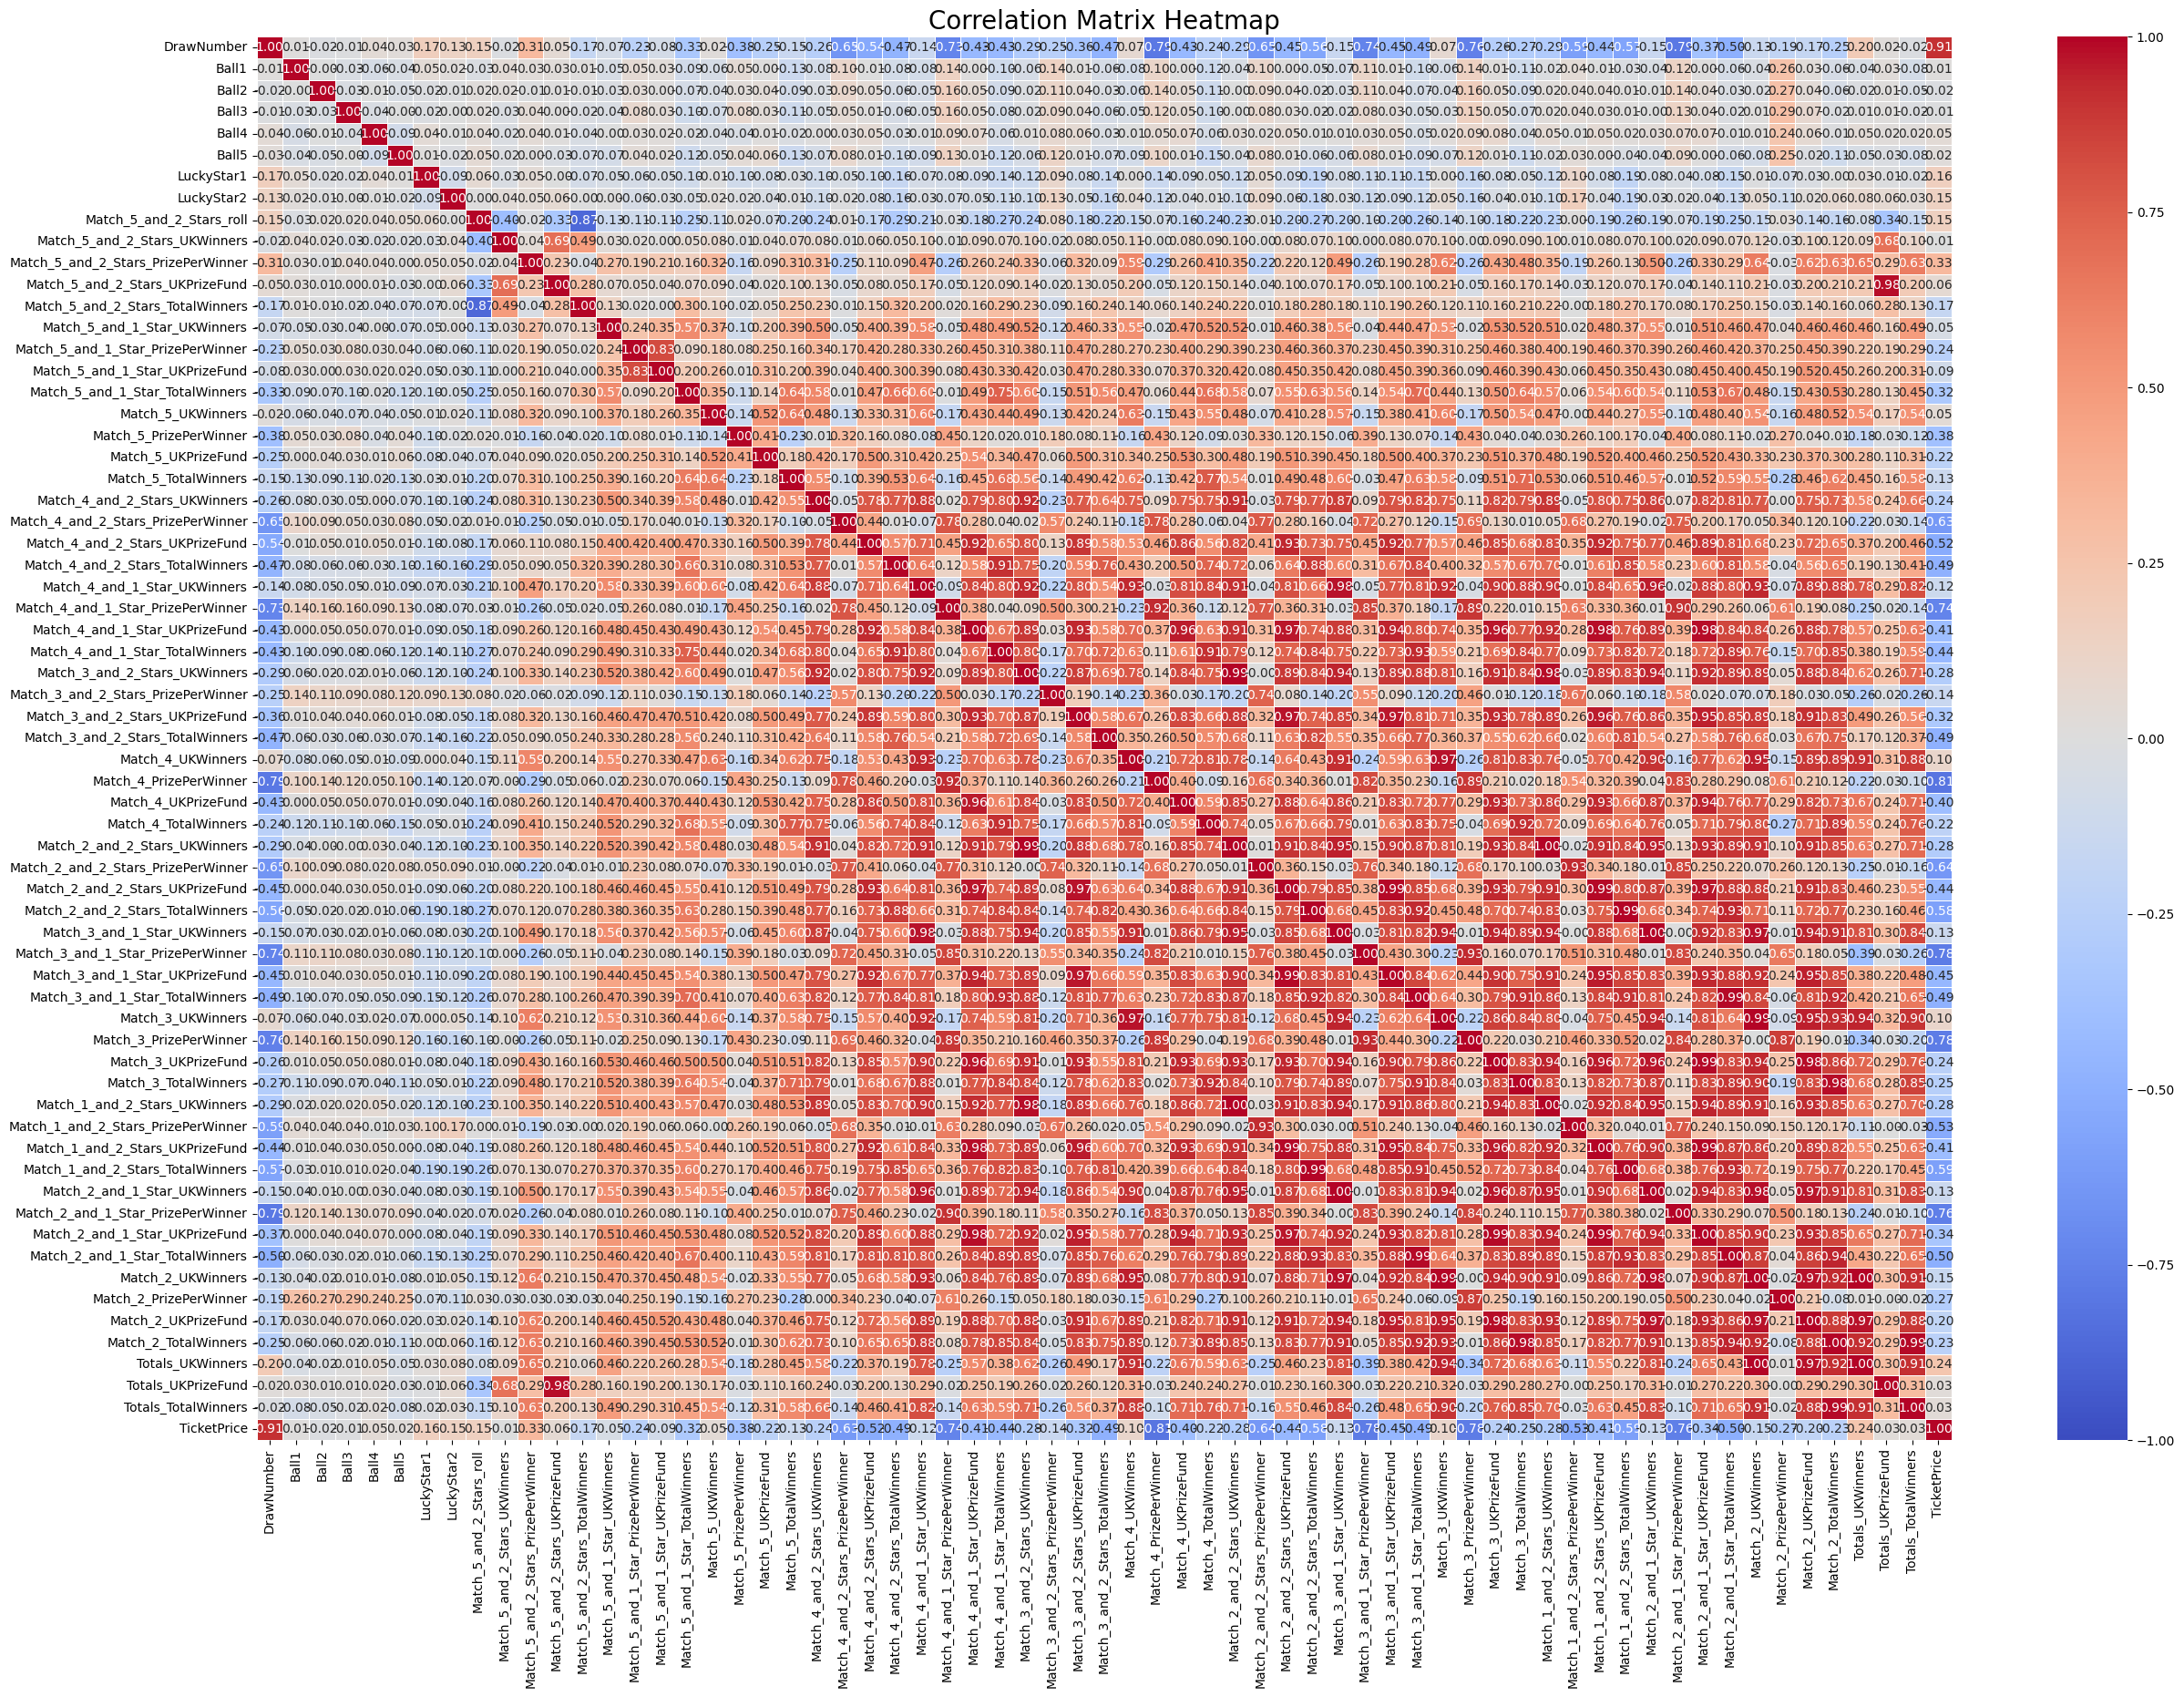

In [28]:
correlation_matrix = df2.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 20))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Set title
plt.title('Correlation Matrix Heatmap', size=20)

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

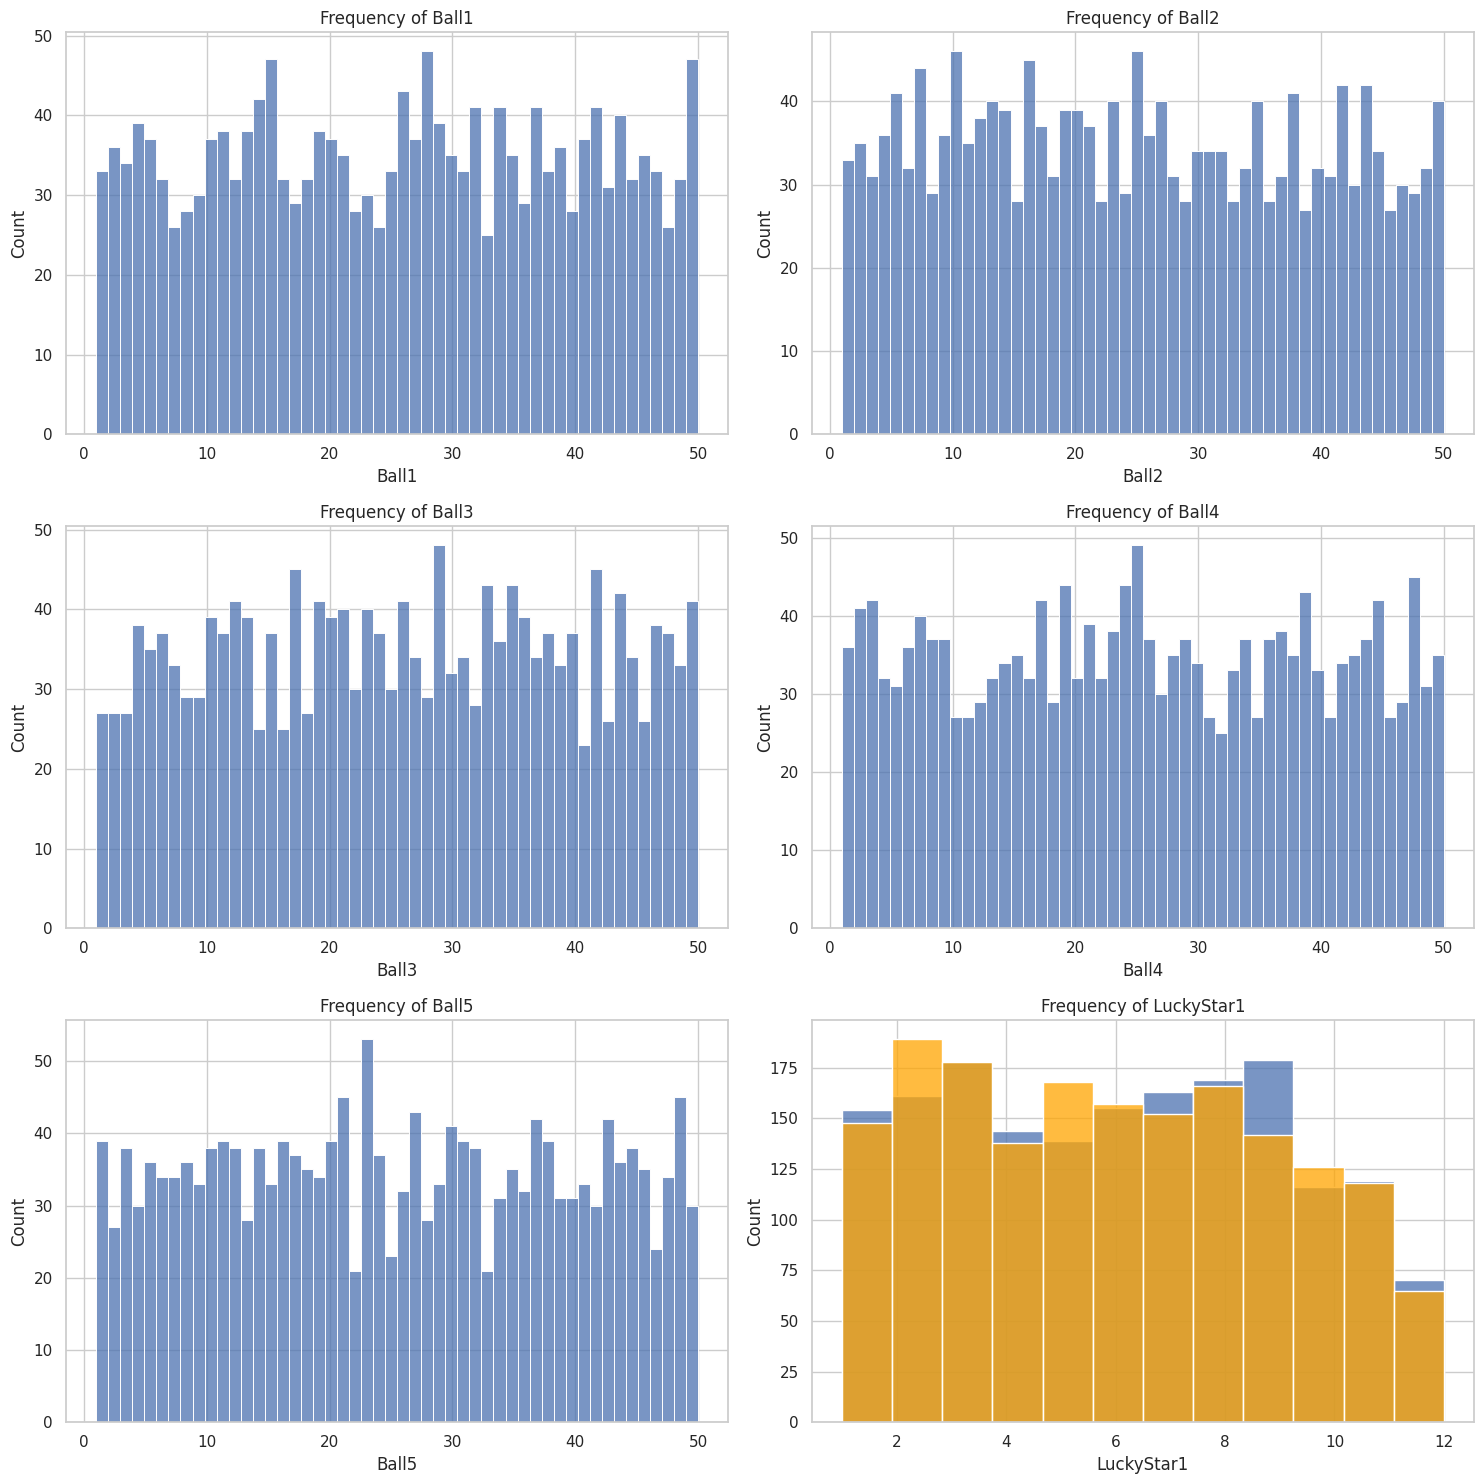

In [31]:
sns.set(style="whitegrid")

# Plot the frequency of the main balls
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(df['Ball1'], bins=50, kde=False, ax=axs[0, 0]).set(title='Frequency of Ball1')
sns.histplot(df['Ball2'], bins=50, kde=False, ax=axs[0, 1]).set(title='Frequency of Ball2')
sns.histplot(df['Ball3'], bins=50, kde=False, ax=axs[1, 0]).set(title='Frequency of Ball3')
sns.histplot(df['Ball4'], bins=50, kde=False, ax=axs[1, 1]).set(title='Frequency of Ball4')
sns.histplot(df['Ball5'], bins=50, kde=False, ax=axs[2, 0]).set(title='Frequency of Ball5')

# Plot the frequency of LuckyStars
sns.histplot(df['LuckyStar1'], bins=12, kde=False, ax=axs[2, 1]).set(title='Frequency of LuckyStar1')
sns.histplot(df['LuckyStar2'], bins=12, kde=False, ax=axs[2, 1], color="orange")

# Adjust layout
plt.tight_layout()
plt.show()

In [34]:
# Handle missing values
df = df.fillna('0')  # Fill numerical missing values with the mean
df = df.fillna(df.mode().iloc[0])  # Fill categorical missing values with the mode

In [36]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


   DrawNumber     Ball1     Ball2     Ball3     Ball4     Ball5  LuckyStar1  \
0    1.731060  0.582658 -0.972331  0.711293  0.527908 -1.559141    1.817220   
1    1.729077 -0.878348 -1.599169 -0.696545 -0.094583  0.459379    0.282073   
2    1.727094  1.556663 -0.693736 -1.330072  0.597073  1.364234    0.282073   
3    1.725111  0.304371  0.072400 -0.766937  0.804570 -0.654287    0.589103   
4    1.723128  1.208804 -1.250926 -1.400464 -1.132068 -0.793495   -0.639015   

   LuckyStar2 UKMillionaireMaker BallSet  ... Match_2_and_1_Star_TotalWinners  \
0   -1.524799      ['TKJZ31572']      21  ...                       -0.380320   
1   -1.524799      ['TJHX51504']      21  ...                        0.424088   
2    0.937430      ['MHHQ42012']      21  ...                       -0.208862   
3   -0.293685      ['HGGP69328']      21  ...                        0.525065   
4   -0.909242      ['XFGJ15568']      21  ...                       -0.597935   

   Match_2_UKWinners  Match_2_PrizePer

In [39]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical features using One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.head())

   DrawNumber     Ball1     Ball2     Ball3     Ball4     Ball5  LuckyStar1  \
0    1.731060  0.582658 -0.972331  0.711293  0.527908 -1.559141    1.817220   
1    1.729077 -0.878348 -1.599169 -0.696545 -0.094583  0.459379    0.282073   
2    1.727094  1.556663 -0.693736 -1.330072  0.597073  1.364234    0.282073   
3    1.725111  0.304371  0.072400 -0.766937  0.804570 -0.654287    0.589103   
4    1.723128  1.208804 -1.250926 -1.400464 -1.132068 -0.793495   -0.639015   

   LuckyStar2  Match_5_and_2_Stars_roll  Match_5_and_2_Stars_UKWinners  ...  \
0   -1.524799                  0.563468                      -0.227323  ...   
1   -1.524799                  0.563468                      -0.227323  ...   
2    0.937430                  0.563468                      -0.227323  ...   
3   -0.293685                  0.563468                      -0.227323  ...   
4   -0.909242                  0.563468                      -0.227323  ...   

   JackpotWinner_country_['Portugal']  \
0        

In [43]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-06-20 10:28:44.942862: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 10:28:44.943079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 10:28:45.118197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [44]:
# Separate features and target variable
X = df.drop('Totals_TotalWinners', axis=1)
y = df['Totals_TotalWinners'] 

In [45]:
# Normalize/Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Assuming a regression problem. Use tf.keras.layers.Dense(1, activation='sigmoid') for binary classification
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [49]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.3440 - mae: 0.9090 - val_loss: 1.0495 - val_mae: 0.7763
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1648 - mae: 0.8475 - val_loss: 0.9701 - val_mae: 0.7552
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4199 - mae: 0.4957 - val_loss: 1.2032 - val_mae: 0.8379
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2024 - mae: 0.3446 - val_loss: 1.9046 - val_mae: 1.0937
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1298 - mae: 0.2632 - val_loss: 1.8925 - val_mae: 1.0887
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0955 - mae: 0.2120 - val_loss: 2.3697 - val_mae: 1.2436
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0729 - mae: 0.1742 - val_loss: 2.2589 - val_mae: 1.2114
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mae: 0.1434 - val_loss: 2.6871 - val_mae: 1.3338
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - mae:

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [51]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} Test MAE: {mae}')

Linear Regression Test MAE: 0.36084412644111546
Decision Tree Test MAE: 0.12066042636369813
Random Forest Test MAE: 0.09006758680037105
Gradient Boosting Test MAE: 0.10083079234361164
